In [46]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt 

diab=pd.read_csv(r"/home/mrinal/F_Drive_Backup/PCS_Documents/pima-indians-diabetes-database/diabetes.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = diab[feature_cols] 
y = diab.Outcome



In [48]:

from sklearn.model_selection import train_test_split



In [49]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

model=linear_model.LogisticRegression()

In [51]:

result=model.fit(X_train,y_train)

/home/mrinal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
y_pred=result.predict(x_test)

In [53]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[119,  11],
       [ 26,  36]])

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8072916666666666


In [55]:
predictions = result.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       130
           1       0.77      0.58      0.66        62

    accuracy                           0.81       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.80      0.81      0.80       192

[[119  11]
 [ 26  36]]
0.8072916666666666


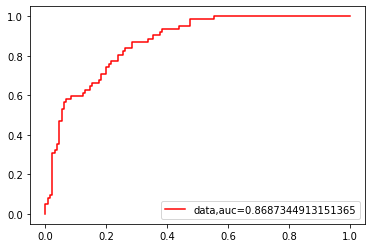

In [57]:
y_pred=result.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label='data,auc='+str(auc),color='r')
plt.legend(loc=4)
plt.show()